# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [52]:
import numpy as np
import matplotlib.pyplot as plt

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [53]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Make a pair plot of the iris features colored by their true classification.

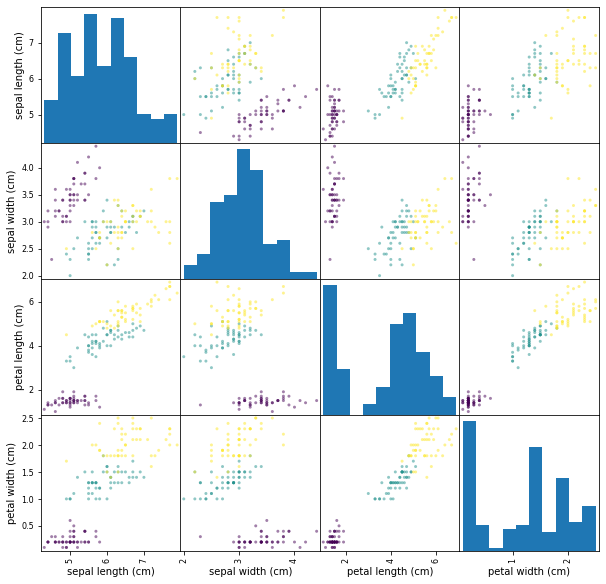

In [54]:
import pandas as pd
from sklearn.cluster import KMeans

file = pd.DataFrame(iris.data, columns = iris.feature_names)
file['class'] = iris.target

pd.plotting.scatter_matrix(file.iloc[:,:4], c = iris.target, figsize = (10, 10))
plt.show()

Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

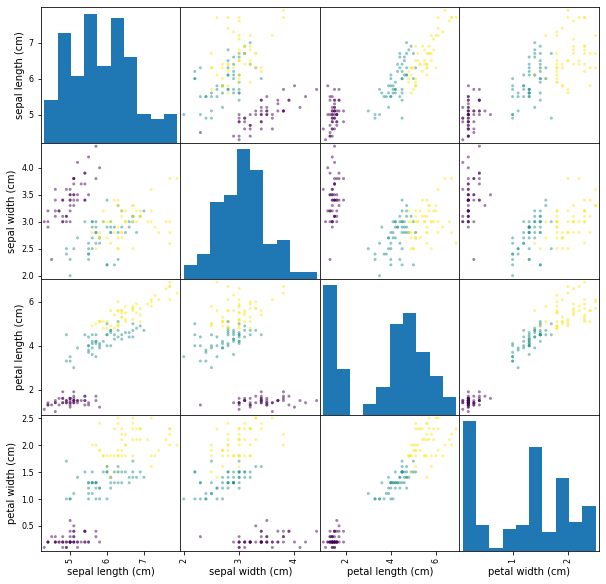

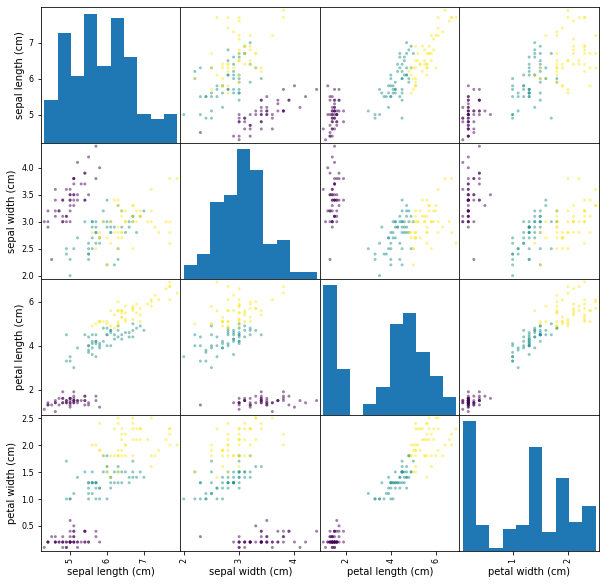

In [55]:
from sklearn.neighbors import KNeighborsClassifier

neighbor3 = KNeighborsClassifier(n_neighbors = 3)
neighbor3.fit(file[iris.feature_names], file['class'])
file['neighbor3'] = neighbor3.predict(file[iris.feature_names])

pd.plotting.scatter_matrix(file[iris.feature_names], c = file['neighbor3'], figsize = (10, 10))
plt.show()

neighbor10 = KNeighborsClassifier(n_neighbors = 10)
neighbor10.fit(file[iris.feature_names], file['class'])
file['neighbor10'] = neighbor10.predict(file[iris.feature_names])

pd.plotting.scatter_matrix(file[iris.feature_names], c = file['neighbor10'], figsize = (10, 10))
plt.show()

Testing the model on the same data it trained on is not a good idea because it already knows which data points belong in which class. Would be better to save some data to test it rather than train with.

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

Accuracry Score 5 0.9733333333333334
Accuracry Score 50 0.9133333333333333


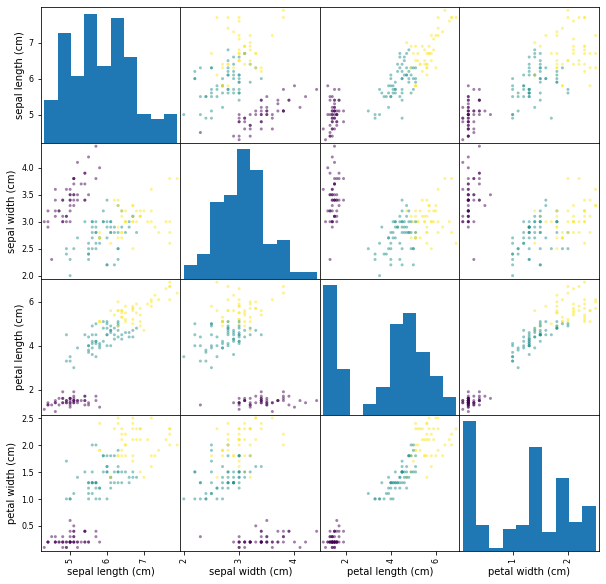

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

neighbor5 = KNeighborsClassifier(n_neighbors = 5)

target = iris.target
target_pred_5 = cross_val_predict(neighbor5, iris.data, target, cv = 5)
file['neighbor5_cv'] = target_pred_5

acc5 = accuracy_score(target, target_pred_5)
print('Accuracry Score 5', acc5)

neighbor50 = KNeighborsClassifier(n_neighbors = 50)

target = iris.target
target_pred_50 = cross_val_predict(neighbor50, iris.data, target, cv = 5)
file['neighbor5_cv'] = target_pred_50

acc50 = accuracy_score(target, target_pred_50)
print('Accuracry Score 50', acc50)

pd.plotting.scatter_matrix(file[iris.feature_names], c = file['neighbor5_cv'], figsize = (10, 10))
plt.show()

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Completeness Data')

for class_idx, class_name in enumerate(iris.target_names):
    actual = (target == class_idx)
    correct_predictions = (target_pred_50 == class_idx) & actual
    completeness = correct_predictions.sum() / actual.sum()
    print(f"Class: {class_name}")
    print(f"  Completeness: {completeness:.2f}")

print('')
print('Purity Data')

for class_idx, class_name in enumerate(iris.target_names):
    predicted = (target_pred_50 == class_idx)
    correct_predictions = (y == class_idx) & predicted
    if predicted.sum() > 0:
        purity = correct_predictions.sum() / predicted.sum()
    else:
        purity = 0
    print(f"Class: {class_name}")
    print(f"  Purity: {purity:.2f}")

Completeness Data
Class: setosa
  Completeness: 1.00
Class: versicolor
  Completeness: 0.94
Class: virginica
  Completeness: 0.80

Purity Data
Class: setosa
  Purity: 1.00
Class: versicolor
  Purity: 0.82
Class: virginica
  Purity: 0.93


The data seems reasonable. Not perfect but pretty good

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

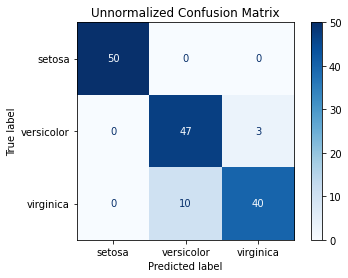

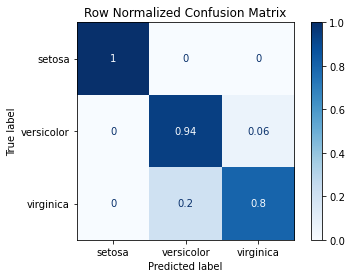

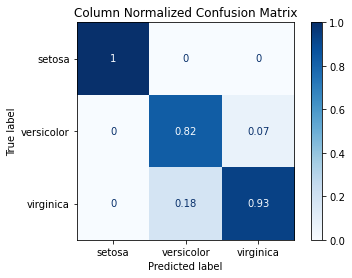

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

target_pred = file['neighbor5_cv']
cm = confusion_matrix(y, file['neighbor5_cv'])

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
display.plot(cmap='Blues')
plt.title("Unnormalized Confusion Matrix")
plt.show()

cm_row = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

display = ConfusionMatrixDisplay(confusion_matrix = cm_row, display_labels = labels)
display.plot(cmap = 'Blues')
plt.title("Row Normalized Confusion Matrix")
plt.show()

cm_col = cm.astype('float') / cm.sum(axis = 0)[np.newaxis, :]

display = ConfusionMatrixDisplay(confusion_matrix = cm_col, display_labels = labels)
display.plot(cmap = 'Blues')
plt.title("Column Normalized Confusion Matrix")
plt.show()

The normalized plots are more useful as you can compare separate models and data sets. Unnormalized data means little on its own.